In [1]:
import pandas as pd

# Iter all annotation files and combine
FILES = [
    "../sp-week-6/annotations_alameda.jsonl",
    "../sp-week-6/annotations_louisville.jsonl",
    "../sp-week-6/annotations_oakland.jsonl",
    "../sp-week-6/annotations_seattle.jsonl",
]

all_annos = []
for f in FILES:
    # Read single annotation file
    sc_df = pd.read_json(f, orient="records", lines=True)
    
    # Iter rows breaking down span info (if there is any)
    for _, row in sc_df.iterrows():
        # Will have span(s) if its a list
        if isinstance(row.spans, list):
            # Create positive examples for each
            for span in row.spans:
                all_annos.append({
                    "text": row.text[span["start"]:span["end"]],
                    "label": "comment-intro",
                    "muni": row.meta["muni"],
                    "session_id": row.meta["session_id"],
                })
        
        # Other no span, create negative example
        else:
            all_annos.append({
                "text": row.text[0:150],
                "label": "other",
                "muni": row.meta["muni"],
                "session_id": row.meta["session_id"],
            })
    
labeled_data = pd.DataFrame(all_annos)
labeled_data

,text,label,muni,session_id
0,Santa Clara and Pacific to use but I would sa...,other,alameda,9c703cd1be77
1,You thanks. But it would probably be wise n...,other,alameda,4fc8bcbb402c
2,And I just really appreciate everything that...,other,alameda,e0a6d7924598
3,Be but both are in front of the same property...,other,alameda,183f3a7b0134
4,Each trip requires a significant investment th...,other,alameda,948e7d26bcde
...,...,...,...,...
3986,I am an employer of a Housecleaner and Im will...,other,seattle,4d8d47ae7888
3987,my name is Katie Figueroa . Im a junior at Ing...,comment-intro,seattle,e3d6d67bec42
3988,So today were going to have the two bills that...,other,seattle,b1f3bc99fdc9
3989,Seattle Transit Advisory Board for terms to Au...,other,seattle,822135139080


In [2]:
from lazy_text_classifiers import LazyTextClassifiers
from sklearn.model_selection import train_test_split
from __future__ import annotations

# Split the data into train and joint eval and test
x_train, x_eval_and_test, y_train, y_eval_and_test = train_test_split(
    labeled_data["text"],
    labeled_data["label"],
    train_size=0.8,
    random_state=12,
    stratify=labeled_data["label"],
)

# Split the eval and test into separate
x_eval, x_test, y_eval, y_test = train_test_split(
    x_eval_and_test,
    y_eval_and_test,
    test_size=0.5,
    random_state=12,
    stratify=y_eval_and_test,
)

# 80%, 10%, 10%
y_train.value_counts(), y_eval.value_counts(), y_test.value_counts()

(other            3072
 comment-intro     120
 Name: label, dtype: int64,
 other            384
 comment-intro     15
 Name: label, dtype: int64,
 other            385
 comment-intro     15
 Name: label, dtype: int64)

In [3]:
# Init and fit all models
ltc = LazyTextClassifiers(random_state=12)
results = ltc.fit(x_train, x_eval, y_train, y_eval)
results

Initializing model: 'tfidf-logit'
Fitting model: 'tfidf-logit'
Testing model: 'tfidf-logit'
'tfidf-logit' eval results: {'model': 'tfidf-logit', 'accuracy': 0.974937343358396, 'balanced_accuracy': 0.7307291666666667, 'precision': 0.9719041192725403, 'recall': 0.974937343358396, 'f1': 0.9719016533582017, 'time': 1.0543773329118267}
Initializing model: 'semantic-logit-distilbert-sst2'


No sentence-transformers model found with name /home/eva/.cache/torch/sentence_transformers/distilbert-base-uncased-finetuned-sst-2-english. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/eva/.cache/torch/sentence_transformers/distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Fitting model: 'semantic-logit-distilbert-sst2'
Testing model: 'semantic-logit-distilbert-sst2'
'semantic-logit-distilbert-sst2' eval results: {'model': 'semantic-logit-distilbert-sst2', 'accuracy': 0.9974937343358395, 'balanced_accuracy': 0.9666666666666667, 'precision': 0.9975002441167855, 'recall': 0.9974937343358395, 'f1': 0.9974521524204215, 'time': 46.071480698068626}
Initializing model: 'semantic-logit-distilbert-emotions'


No sentence-transformers model found with name /home/eva/.cache/torch/sentence_transformers/joeddav_distilbert-base-uncased-go-emotions-student. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/eva/.cache/torch/sentence_transformers/joeddav_distilbert-base-uncased-go-emotions-student were not used when initializing DistilBertModel: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Fitting model: 'semantic-logit-distilbert-emotions'
Testing model: 'semantic-logit-distilbert-emotions'
'semantic-logit-distilbert-emotions' eval results: {'model': 'semantic-logit-distilbert-emotions', 'accuracy': 0.9949874686716792, 'balanced_accuracy': 0.9333333333333333, 'precision': 0.9950134403365928, 'recall': 0.9949874686716792, 'f1': 0.9948149594766137, 'time': 42.13888486707583}
Initializing model: 'semantic-logit-mpnet-base-v2'
Fitting model: 'semantic-logit-mpnet-base-v2'
Testing model: 'semantic-logit-mpnet-base-v2'
'semantic-logit-mpnet-base-v2' eval results: {'model': 'semantic-logit-mpnet-base-v2', 'accuracy': 0.9949874686716792, 'balanced_accuracy': 0.9653645833333333, 'precision': 0.9949874686716792, 'recall': 0.9949874686716792, 'f1': 0.9949874686716792, 'time': 76.20610544097144}
Initializing model: 'semantic-logit-multi-qa-mpnet-base-v1'
Fitting model: 'semantic-logit-multi-qa-mpnet-base-v1'
Testing model: 'semantic-logit-multi-qa-mpnet-base-v1'
'semantic-logit-mul

,model,accuracy,balanced_accuracy,precision,recall,f1,time
0,semantic-logit-distilbert-sst2,0.997494,0.966667,0.997500,0.997494,0.997452,46.071481
1,semantic-logit-mpnet-base-v2,0.994987,0.965365,0.994987,0.994987,0.994987,76.206105
2,semantic-logit-distilbert-emotions,0.994987,0.933333,0.995013,0.994987,0.994815,42.138885
3,semantic-logit-multi-qa-mpnet-base-v1,0.989975,0.962760,0.990846,0.989975,0.990275,78.363277
4,tfidf-logit,0.974937,0.730729,0.971904,0.974937,0.971902,1.054377


In [4]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

test_metrics = []
for model in results.model:
    pred_y_test = ltc.fit_models[model].predict(x_test)
    pre, rec, f1, _ = precision_recall_fscore_support(y_test, pred_y_test, average="weighted")
    test_metrics.append({
        "model": model,
        "precision": pre,
        "recall": rec,
        "f1": f1,
    })

test_metrics = pd.DataFrame(test_metrics)
test_metrics = test_metrics.sort_values(by="f1", ascending=False).reset_index(drop=True)
test_metrics

,model,precision,recall,f1
0,semantic-logit-distilbert-emotions,0.995026,0.9950,0.994828
1,semantic-logit-distilbert-sst2,0.990000,0.9900,0.990000
2,semantic-logit-mpnet-base-v2,0.990625,0.9875,0.988352
3,semantic-logit-multi-qa-mpnet-base-v1,0.987605,0.9850,0.985843
4,tfidf-logit,0.968527,0.9725,0.968439


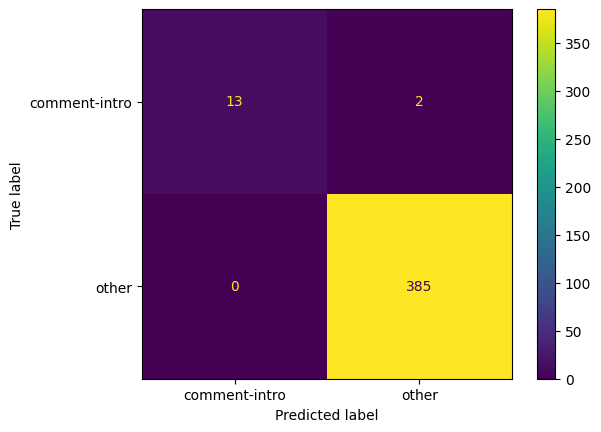

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

pred_sem_emo = ltc.fit_models["semantic-logit-distilbert-emotions"].predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, pred_sem_emo)

In [6]:
irr_set = pd.read_json("local-interest-groups-irr-annotation-set.jsonl", orient="records", lines=True)
irr_set

,text,meta
0,"Good morning. As you said, I'm a downtown resi...","{'muni': 'seattle', 'session_id': '6c40d8abf3c9'}"
1,Down morning. I'm chair of tree pack. It's dis...,"{'muni': 'seattle', 'session_id': '6c40d8abf3c9'}"
2,"So Doug and Andrew if you are out there, call ...","{'muni': 'seattle', 'session_id': '6c40d8abf3c9'}"
3,"Thank you. Hi, I just want to bring attention ...","{'muni': 'seattle', 'session_id': 'c6bbc7ceec24'}"
4,"Yes, I'm here. I'm unmuted, it appears. Yes. O...","{'muni': 'seattle', 'session_id': 'c6bbc7ceec24'}"
5,"Good afternoon, Council. Thank you for the cha...","{'muni': 'seattle', 'session_id': 'c6bbc7ceec24'}"
6,"Good morning, Pete her. Good morning. I'm in d...","{'muni': 'seattle', 'session_id': 'd9f30ac22162'}"
7,"Jacob, good morning. Hi. I'm Jacob sheer, Orga...","{'muni': 'seattle', 'session_id': 'd9f30ac22162'}"
8,"Good morning. I am Madison, resident of distri...","{'muni': 'seattle', 'session_id': 'd9f30ac22162'}"
9,Good morning. I want to address your agenda it...,"{'muni': 'seattle', 'session_id': '5ebad5eae48c'}"


In [7]:
window_size = 20
stride = 4
tolerence = 2
count_found = 0

import spacy
nlp = spacy.load("en_core_web_trf")

for _, row in irr_set.iterrows():
    print("ORIGINAL TEXT")
    print(row.text)
    print()
    print()
    
    words = row.text.split()
    current_classification_content = []
    current_tol = 0
    for w_i in range(0, len(words) - window_size + 1, stride):
        # Get current window
        windowed_words = words[w_i: w_i + window_size]
        content = " ".join(windowed_words)
        
        # Pred
        pred = ltc.fit_models["semantic-logit-distilbert-emotions"].predict([content])
        
        # handle intro pred
        if pred == "comment-intro":
            # chop everything off except last stride
            if len(current_classification_content) != 0:
                current_classification_content.append(" ".join(windowed_words[-stride:]))
            # if first one, add it all
            else:
                current_classification_content.append(content)
        
        # handle end of pred
        else:            
            # handle existing pred
            if len(current_classification_content) != 0:
                # handle tolerance
                if current_tol < tolerence:
                    current_classification_content.append(" ".join(windowed_words[-stride:]))
                    current_tol += 1
                else:
                    count_found += 1
                    joined_content = " ".join(current_classification_content)
                    doc = nlp(joined_content)
                    print("COMMENT INTRO")
                    print(joined_content)
                    print()
                    print()

                    encountered_person = False
                    encountered_org = False
                    for ent in doc.ents:
                        if ent.label_ == "PERSON" and not encountered_person:
                            print(f"{ent.label_}: '{ent.text}'")
                            encountered_person = True
                        elif ent.label_ == "ORG" and not encountered_org:
                            print(f"{ent.label_}: '{ent.text}'")
                            encountered_org = True

                        if encountered_person and encountered_org:
                            break
                    print()
                    print()
                    current_classification_content = []
    
    print("-" * 80)
    print()
            
print(count_found)

ORIGINAL TEXT
Good morning. As you said, I'm a downtown resident in district 7. I'm Commenting today on Sdci and the committee's work program for changes to land use and design we view. We ask this work be done with public engagement. I'd like to Commentfor a great job. Public forums need to be the standard for design review.


COMMENT INTRO
said, I'm a downtown resident in district 7. I'm Commenting today on Sdci and the committee's work program for changes to land use and design we view. We ask this work be


ORG: 'Sdci'


--------------------------------------------------------------------------------

ORIGINAL TEXT
Down morning. I'm chair of tree pack. It's disappointing to not see updating the tree ordinance as a priority in 2021 in their presentation which was put on the Website it is not surprising, however, considering Sdci's history on tree protection. Rumor has it there will not be a tree ordinance update this year. It's time to end this repeated delay by Sdci in presenting t

In [8]:
from cdp_data import datasets, CDPInstances

sessions = datasets.get_session_dataset(
    CDPInstances.Seattle,
    start_datetime="2022-03-15",
    end_datetime="2022-03-16",
    raise_on_error=False,
    store_transcript=True,
)
session = sessions.iloc[0]
session

Fetching each model attached to event_ref:   0%|          | 0/2 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/2 [00:00<?, ?it/s]

session_datetime                                2022-03-15 16:30:00+00:00
session_index                                                           0
session_content_hash    f0fb7bdf0e08fcb83125e83960013964f9b72212b38a86...
video_uri               https://video.seattle.gov/media/council/tran_0...
video_start_time                                                     None
video_end_time                                                       None
caption_uri             https://www.seattlechannel.org/documents/seatt...
external_source_id                                                   None
id                                                           d369999a1d67
key                                                  session/d369999a1d67
event                   <cdp_backend.database.models.Event object at 0...
transcript              <cdp_backend.database.models.Transcript object...
transcript_path         /home/eva/active/pit/sig-cdp/trial-pc-intro-cl...
Name: 0, dtype: object

In [9]:
from cdp_backend.pipeline.transcript_model import Transcript

with open(session.transcript_path) as open_t:
    transcript = Transcript.from_json(open_t.read())

transcript

Transcript(generator='CDP Whisper Conversion -- CDP v4.0.8 -- Whisper Model Name 'large-v2'', confidence=0.72, session_datetime='2022-03-15T09:30:00-07:00', created_datetime='2023-03-14T10:35:07.350721', sentences=[...] (n=1189), annotations=None)

In [10]:
from datetime import timedelta

window_size = 2

for s_i in range(len(transcript.sentences) - window_size + 1):
    content = " ".join([s.text for s in transcript.sentences[s_i: s_i + window_size]])
    pred = ltc.fit_models["semantic-logit-distilbert-emotions"].predict([content])
    if pred != "other":
        st = timedelta(seconds=transcript.sentences[s_i].start_time)
        print("COMMENT INTRO")
        print(f"{st}: '{content}'")
        print()
        print()
        
        encountered_person = False
        encountered_org = False
        doc = nlp(content)
        for ent in doc.ents:
            if ent.label_ == "PERSON" and not encountered_person:
                print(f"{ent.label_}: '{ent.text}'")
                encountered_person = True
            elif ent.label_ == "ORG" and not encountered_org:
                print(f"{ent.label_}: '{ent.text}'")
                encountered_org = True

            if encountered_person and encountered_org:
                break
        
        print("-" * 80)
        print()

COMMENT INTRO
0:09:12.161834: 'Hello. My name is Robin Briggs.'


PERSON: 'Robin Briggs'
--------------------------------------------------------------------------------

COMMENT INTRO
0:11:02.513988: 'Good morning, committee members. My name is Rachel Schaefer.'


PERSON: 'Rachel Schaefer'
--------------------------------------------------------------------------------

COMMENT INTRO
0:11:03.937758: 'My name is Rachel Schaefer. I'm speaking on behalf of Cascade Bicycle Club also regarding the Seattle transportation plan.'


PERSON: 'Rachel Schaefer'
ORG: 'Cascade Bicycle Club'
--------------------------------------------------------------------------------

COMMENT INTRO
0:15:49.995087: 'My name is Julia Buck. I'm a resident of District 6.'


PERSON: 'Julia Buck'
--------------------------------------------------------------------------------

COMMENT INTRO
0:17:23.923761: 'Hi, this is Kashina Groves. I'm a resident of District 2 and a member of the Seattle Bicycle Advisory Board.'




In [11]:
import pickle

In [12]:
with open("stored-classifier.pkl", "wb") as open_f:
    pickle.dump(ltc.fit_models["semantic-logit-distilbert-emotions"], open_f)

In [13]:
with open("stored-classifier.pkl", "rb") as open_f:
    new_model = pickle.load(open_f)

In [14]:
new_model.predict(["Hello my name is Eva and I am a member of UAW4121"])

array(['comment-intro'], dtype=object)